   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

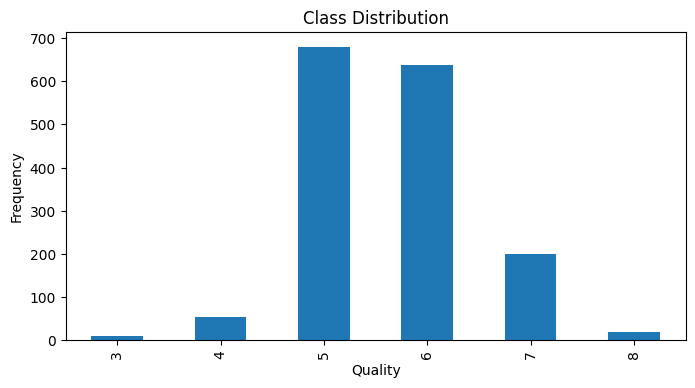

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from collections import Counter

# Load dataset
df = pd.read_csv('winequality-red.csv',delimiter=';')  

# Inspect the dataset
print(df.head())
print(df.info())
print(df['quality'].value_counts())

# Plot class distribution
plt.figure(figsize=(8, 4))
df['quality'].value_counts().sort_index().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

In [2]:
#extract and split data
X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [3]:
#scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
#compare and select classifiers
clf1 = RandomForestClassifier(random_state=42)
clf2 = SVC(random_state=42)

crossV = RepeatedKFold(n_splits = 3, n_repeats = 10)

best_score = 0
best_clf = None
clf_name = ''
for clf,name in zip([clf1,clf2],['RamdomForest','SVM']):
    scores = cross_val_score(clf,X_train,y_train,cv=crossV,scoring='accuracy')
    mean_scores = scores.mean()
    print(f"{name} - Accuracy: {mean_scores:.3f} (+/- {scores.std():.3f})")
    if mean_scores>best_score:
        best_score = mean_scores
        best_clf = clf
        clf_name = name

print(f"Best classifier:{clf_name}")

RamdomForest - Accuracy: 0.655 (+/- 0.021)
SVM - Accuracy: 0.502 (+/- 0.019)
Best classifier:RamdomForest


In [6]:
#Show performance with the best classifier
best_clf.fit(X_train_scaled,y_train)

test_accuracy = best_clf.score(X_test_scaled,y_test)
print(f"Test Accuracy: {test_accuracy:.3f}")

y_pred = best_clf.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head()) 

Test Accuracy: 0.675
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.71      0.76      0.73       136
           6       0.64      0.70      0.67       128
           7       0.71      0.55      0.62        40
           8       0.50      0.33      0.40         3

    accuracy                           0.68       320
   macro avg       0.43      0.39      0.40       320
weighted avg       0.65      0.68      0.66       320

     Actual  Predicted
963       6          6
475       5          6
1         5          5
329       5          6
149       6          5


C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
#balanced data
sm = SMOTE(random_state=42)
X_train_balanced,y_train_balanced = sm.fit_resample(X_train_scaled,y_train)
print(f'Original:{Counter(y_train)}')
print(f'Balanced:{Counter(y_train_balanced)}')

Original:Counter({5: 545, 6: 510, 7: 159, 4: 42, 8: 15, 3: 8})
Balanced:Counter({6: 545, 5: 545, 7: 545, 3: 545, 4: 545, 8: 545})


In [7]:
#reselect classifier
best_score = 0
best_clf = None
clf_name = ''
for clf,name in zip([clf1,clf2],['RamdomForest','SVM',]):
    scores = cross_val_score(clf,X_train_balanced,y_train_balanced,cv=crossV,scoring='accuracy')
    mean_scores = scores.mean()
    print(f"{name} - Accuracy: {mean_scores:.3f} (+/- {scores.std():.3f})")
    if mean_scores>best_score:
        best_score = mean_scores
        best_clf = clf
        clf_name = name

print(f"Best classifier:{clf_name}")

RamdomForest - Accuracy: 0.862 (+/- 0.013)
SVM - Accuracy: 0.756 (+/- 0.011)
Best classifier:RamdomForest


In [8]:
#Report performance
best_clf.fit(X_train_balanced,y_train_balanced)
y_b_pred = best_clf.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_b_pred)) 

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.12      0.27      0.17        11
           5       0.73      0.68      0.70       136
           6       0.68      0.60      0.64       128
           7       0.51      0.55      0.53        40
           8       0.11      0.33      0.17         3

    accuracy                           0.61       320
   macro avg       0.36      0.41      0.37       320
weighted avg       0.65      0.61      0.63       320

